# Quantify behavioral data from fMRI C-PRO experiment

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import analyzeBehavior as analyze
from importlib import reload
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Arial"

##### Load and sort data

In [3]:
datadir = '../../../data/fMRI_BehavData/'

subjNums = ['013','014','016','017','018','021','023','024','026','027','028','030','031','032','033',
            '034','035','037','038','039','040','041','042','043','045','046','047','048','049','050',
            '053','055','056','057','058','062','063','066','067','068','069','070','072','074','075',
            '076','077','081','085','086','087','088','090','092','093','094','095','097','098','099',
            '101','102','103','104','105','106','108','109','110','111','112','114','115','117','119',
            '120','121','122','123','124','125','126','127','128','129','130','131','132','134','135',
            '136','137','138','139','140','141']
# # ### Doesn't need to be run again

# keyValues = {'Logic':'LogicCue[LogLevel5]', 'Sensory':'SemanticCue[LogLevel5]', 'Motor':'ResponseCue[LogLevel5]','Accuracy':'Feedback[LogLevel6]', 'Novelty':'TaskType_rec', 'TaskNum':'TaskName[LogLevel5]',
#              'PracTaskIntro':'PracIntroExampleList',
#              'LogicExample':'LogicCue[SubTrial]','SensoryExample':'SemanticCue[SubTrial]','MotorExample':'ResponseCue[SubTrial]',
#              'PracIntroAccuracy':'Feedback[LogLevel5]','RT':'ProbeStim1.RT'}
# # Simplify dataframe into easier key-value strings
# for subj in subjNums:
#     df = pd.read_csv(datadir + subj + '_behavdata.csv')
#     df_new = {}
#     for key in keyValues:
#         df_new[key] = df[keyValues[key]].values
        
#     df = pd.DataFrame(df_new)
#     df.to_csv(datadir + subj + '_behavdata_reformatted.csv')
        

# Plot performances across different conditions
* Novel and practiced conditions
* 1st presentation of practiced tasks, 2nd presentation of practiced tasks
* 1st presentation of novel tasks, 2nd presentation of novel tasks

# Practiced vs. novel tasks

Practice accuracy: 0.8719618055555555
Novel accuracy: 0.8567708333333334
Practiced versus Novel: stat = 1747.5 | p = 0.033876094593100974


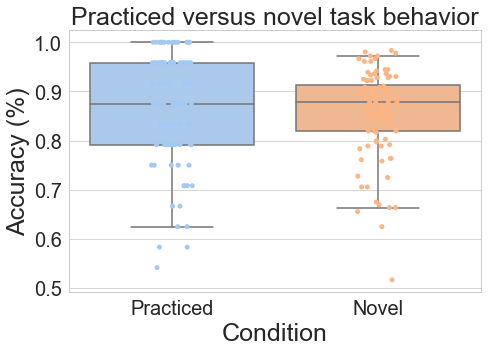

In [4]:
analyze = reload(analyze)
df_acc = analyze.behaviorOfNovelty(subjNums)

prac_acc = df_acc.loc[df_acc['Condition']=='Practiced']
nov_acc = df_acc.loc[df_acc['Condition']=='Novel']
print('Practice accuracy:', np.mean(prac_acc.Accuracy.values))
print('Novel accuracy:', np.mean(nov_acc.Accuracy.values))
t, p = stats.wilcoxon(prac_acc.Accuracy.values,nov_acc.Accuracy.values)
print('Practiced versus Novel: stat =', t, '| p =', p)


plt.figure(figsize=(7,5))
tmp_df = pd.concat([prac_acc,nov_acc])
plt.title('Practiced versus novel task behavior',fontsize=25)
ax = sns.boxplot(x="Condition",y="Accuracy",data=tmp_df,
           medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="pastel")
ax = sns.stripplot(x="Condition",y="Accuracy",data=tmp_df,
              dodge=True,palette="pastel")
plt.xticks(rotation=0,fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Accuracy (%)',fontsize=25)
plt.xlabel('Condition', fontsize=25)
plt.tight_layout()

# Plot accuracy differences for 1st versus 2nd presentations for practiced and novel conditions

Practice 1 acc = 0.8767361111111112 | Practice 2 acc = 0.8671875
Practiced 1 versus Practiced 2: stat = 1127.5 | p = 0.6274446231475839
Novel 1 acc = 0.8430555555555556 | Novel 2 acc = 0.8704861111111111
Novel 1 versus Novel 2: stat = 992.5 | p = 3.5721449951223245e-05


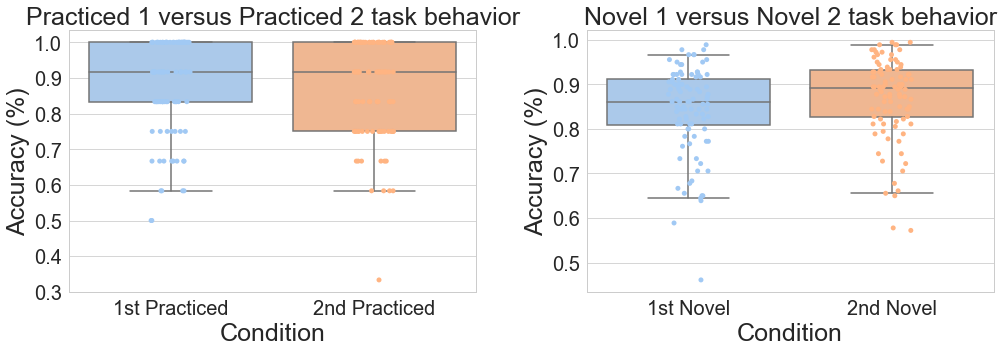

In [5]:
prac1_acc = df_acc.loc[df_acc['Condition']=='1st Practiced']
prac2_acc = df_acc.loc[df_acc['Condition']=='2nd Practiced']
nov1_acc = df_acc.loc[df_acc['Condition']=='1st Novel']
nov2_acc = df_acc.loc[df_acc['Condition']=='2nd Novel']
print('Practice 1 acc =', np.mean(prac1_acc.Accuracy.values), '| Practice 2 acc =', np.mean(prac2_acc.Accuracy.values))
t, p = stats.wilcoxon(prac1_acc.Accuracy.values,prac2_acc.Accuracy.values)
print('Practiced 1 versus Practiced 2: stat =', t, '| p =', p)
print('Novel 1 acc =', np.mean(nov1_acc.Accuracy.values), '| Novel 2 acc =', np.mean(nov2_acc.Accuracy.values))
t, p = stats.wilcoxon(nov1_acc.Accuracy.values,nov2_acc.Accuracy.values)
print('Novel 1 versus Novel 2: stat =', t, '| p =', p)




plt.figure(figsize=(14,5))
plt.subplot(121)
tmp_df = pd.concat([prac1_acc,prac2_acc])
plt.title('Practiced 1 versus Practiced 2 task behavior',fontsize=25)
ax = sns.boxplot(x="Condition",y="Accuracy",data=tmp_df,
           medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="pastel")
ax = sns.stripplot(x="Condition",y="Accuracy",data=tmp_df,
              dodge=True,palette="pastel")
plt.xticks(rotation=0,fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Accuracy (%)',fontsize=25)
plt.xlabel('Condition', fontsize=25)
plt.tight_layout()

plt.subplot(122)
tmp_df = pd.concat([nov1_acc,nov2_acc])
plt.title('Novel 1 versus Novel 2 task behavior',fontsize=25)
ax = sns.boxplot(x="Condition",y="Accuracy",data=tmp_df,
           medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="pastel")
ax = sns.stripplot(x="Condition",y="Accuracy",data=tmp_df,
              dodge=True,palette="pastel")
plt.xticks(rotation=0,fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Accuracy (%)',fontsize=25)
plt.xlabel('Condition', fontsize=25)
plt.tight_layout()

# Evaluate performances of task similarity to practiced tasks
* Practiced task → 2 rule similarity → 1 rule similarity

Practice accuracy: 0.8719618055555555
2-rule similarity accuracy: 0.8576388888888888
1-rule similarity accuracy: 0.85546875
Practiced versus 2-rule: stat = 1757.5 | p = 0.052388882763131556
2-rule versus 1-rule: stat = 2070.0 | p = 0.788122539703966


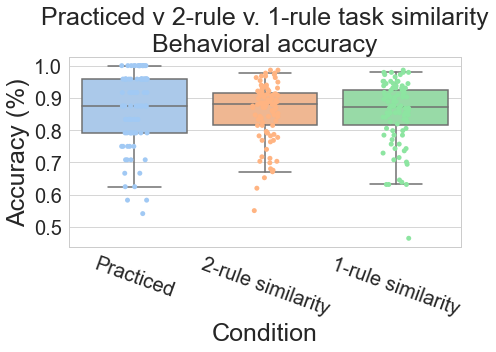

In [6]:
analyze = reload(analyze)
df_acc = analyze.behaviorOfTaskSimilarity(subjNums,firstOnly=False)

prac_acc = df_acc.loc[df_acc['Condition']=='Practiced']
rule2_acc = df_acc.loc[df_acc['Condition']=='2-rule similarity']
rule1_acc = df_acc.loc[df_acc['Condition']=='1-rule similarity']
print('Practice accuracy:', np.mean(prac_acc.Accuracy.values))
print('2-rule similarity accuracy:', np.mean(rule2_acc.Accuracy.values))
print('1-rule similarity accuracy:', np.mean(rule1_acc.Accuracy.values))
t, p = stats.wilcoxon(prac_acc.Accuracy.values,rule2_acc.Accuracy.values)
print('Practiced versus 2-rule: stat =', t, '| p =', p)
t, p = stats.wilcoxon(rule2_acc.Accuracy.values,rule1_acc.Accuracy.values)
print('2-rule versus 1-rule: stat =', t, '| p =', p)


plt.figure(figsize=(7,5))
tmp_df = pd.concat([prac_acc,rule2_acc,rule1_acc])
plt.title('Practiced v 2-rule v. 1-rule task similarity\nBehavioral accuracy',fontsize=25)
ax = sns.boxplot(x="Condition",y="Accuracy",data=tmp_df,
           medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="pastel")
ax = sns.stripplot(x="Condition",y="Accuracy",data=tmp_df,
              dodge=True,palette="pastel")
plt.xticks(rotation=-20,fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Accuracy (%)',fontsize=25)
plt.xlabel('Condition', fontsize=25)
plt.tight_layout()

# Practiced v 2-rule v 1-rule on first presentation of tasks only

Practice accuracy: 87.6736111111111
2-rule similarity accuracy: 84.85725308641975
1-rule similarity accuracy: 83.47800925925925
Practiced versus 2-rule: stat = 1598.0 | p = 0.007629746111402928
2-rule versus 1-rule: stat = 1669.0 | p = 0.03356337180402668


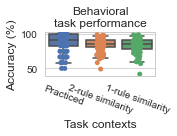

In [8]:
analyze=reload(analyze)
df_acc = analyze.behaviorOfTaskSimilarity(subjNums,firstOnly=True)
df_acc.Accuracy = df_acc.Accuracy.values * 100.0
prac_acc = df_acc.loc[df_acc['Condition']=='Practiced']
rule2_acc = df_acc.loc[df_acc['Condition']=='2-rule similarity']
rule1_acc = df_acc.loc[df_acc['Condition']=='1-rule similarity']
print('Practice accuracy:', np.mean(prac_acc.Accuracy.values))
print('2-rule similarity accuracy:', np.mean(rule2_acc.Accuracy.values))
print('1-rule similarity accuracy:', np.mean(rule1_acc.Accuracy.values))
t, p = stats.wilcoxon(prac_acc.Accuracy.values,rule2_acc.Accuracy.values)
print('Practiced versus 2-rule: stat =', t, '| p =', p)
t, p = stats.wilcoxon(rule2_acc.Accuracy.values,rule1_acc.Accuracy.values)
print('2-rule versus 1-rule: stat =', t, '| p =', p)


plt.figure(figsize=(2.5,2))
tmp_df = pd.concat([prac_acc,rule2_acc,rule1_acc])
plt.title('Behavioral\ntask performance',fontsize=12)
ax = sns.boxplot(x="Condition",y="Accuracy",data=tmp_df,
           medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="deep")
ax = sns.stripplot(x="Condition",y="Accuracy",data=tmp_df,
              dodge=True,palette="deep")
plt.xticks(rotation=-20,fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Accuracy (%)',fontsize=12)
plt.xlabel('Task contexts', fontsize=12)
plt.tight_layout()
plt.savefig('BehavioralEvidenceForCompositionality.png',dpi=300)